(200, 2)


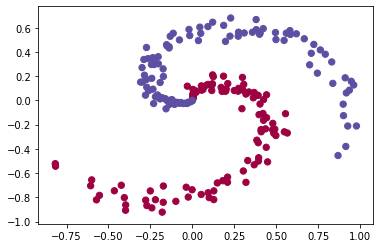

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# show plot first run
%matplotlib inline 
# test autocompletion with tab or tab+shift
%config IPCompleter.greedy=True 

N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
yc = np.zeros((N*K,2))
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    if j == 0:
        yc[ix] = np.matrix([[1, 0]])
    else:
        yc[ix] = np.matrix([[0, 1]])
# lets visualize the data:
print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [5]:
h = 1000
W1 = 0.1 * np.random.randn(D, h)
W2 = 0.1 * np.random.randn(h, K)

learning_rate = 1e-4

def relu(x):
    return np.maximum(0.0,x)

def relu_derivative(output):
    output[output <= 0] = 0
    output[output>0] = 1
    return output


for i in range(5000):
    
    m1 = np.dot(X, W1)
    #print(m1.shape)
    a1 = relu(m1)
    
    m2 = np.dot(a1, W2)
    #print(m2.shape)
    cost = np.sum((m2 - yc)**2)
    if i % 100 == 0:
        print("iteration %d: cost %f" % (i, cost))
        
    dCostdm2 = 2*(m2 - yc) # for W2 und W1
    dm2da1 = W2
    dm2dW2 = a1 # for W2
    da1dm1 = relu_derivative(a1)
    
    dm1dW1 = X
    
    tmp1 = np.dot(dCostdm2, dm2da1.T)
    tmp2 = tmp1 * da1dm1              #        --------------tmp2-------------
                                      #        -------tmp1-------   
    dCostdW1 = np.dot(dm1dW1.T, tmp2) # W1' = X.T * ((2*(m2-yc)* W2.T ) * relu(a1) )
    
    dCostdW2 = np.dot(dm2dW2.T, dCostdm2) # W2' = a1.T * 2*(m2 - yc)
    
    W1 -= learning_rate * dCostdW1
    W2 -= learning_rate * dCostdW2
    
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W1))
scores = np.dot(hidden_layer, W2)
# print(scores)
print(scores)
predicted_class = np.argmax(scores, axis=1)
print(predicted_class)
print(predicted_class == y)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))
    

iteration 0: cost 185.477238
iteration 100: cost 89.430107
iteration 200: cost 87.786111
iteration 300: cost 86.514470
iteration 400: cost 85.362643
iteration 500: cost 84.794300
iteration 600: cost 84.624689
iteration 700: cost 84.129815
iteration 800: cost 83.823069
iteration 900: cost 83.469676
iteration 1000: cost 83.084363
iteration 1100: cost 82.063845
iteration 1200: cost 81.800588
iteration 1300: cost 81.886727
iteration 1400: cost 80.598354
iteration 1500: cost 80.179841
iteration 1600: cost 80.095862
iteration 1700: cost 80.088744
iteration 1800: cost 80.633104
iteration 1900: cost 80.478064
iteration 2000: cost 80.943944
iteration 2100: cost 80.650316
iteration 2200: cost 79.544172
iteration 2300: cost 79.018958
iteration 2400: cost 77.311134
iteration 2500: cost 75.640017
iteration 2600: cost 76.811898
iteration 2700: cost 97.533137
iteration 2800: cost 74.359767
iteration 2900: cost 73.560967
iteration 3000: cost 87.502168
iteration 3100: cost 72.462998
iteration 3200: cos

(-1.905854696231461, 1.654145303768542)

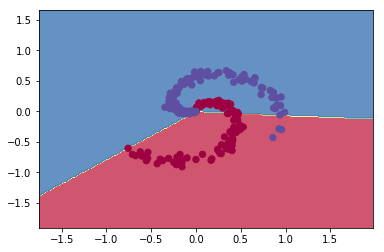

In [6]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1)), W2)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')